<a href="https://colab.research.google.com/github/TheThirdKnife/Student/blob/main/%22%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_(StudentPerformanceFactors)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Импортируем библиотеки
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Загружаем набор данных
StudentPerformanceFactors = pd.read_csv('/content/drive/MyDrive/StudentPerformanceFactors.csv')
StudentPerformanceFactors.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [10]:
# Сохраняем в новый фрейм столбцы предикторов
X=StudentPerformanceFactors.drop(['Exam_Score'], axis=1)
# Сохраняем в переменную y отклик
y=StudentPerformanceFactors.Exam_Score
# Информация о структуре X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [12]:
# Преобразуем категориальные переменные в dummy
X=pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int64
 1   Attendance                             6607 non-null   int64
 2   Sleep_Hours                            6607 non-null   int64
 3   Previous_Scores                        6607 non-null   int64
 4   Tutoring_Sessions                      6607 non-null   int64
 5   Physical_Activity                      6607 non-null   int64
 6   Parental_Involvement_Low               6607 non-null   bool 
 7   Parental_Involvement_Medium            6607 non-null   bool 
 8   Access_to_Resources_Low                6607 non-null   bool 
 9   Access_to_Resources_Medium             6607 non-null   bool 
 10  Extracurricular_Activities_Yes         6607 non-null   bool 
 11  Motivation_Level_Low          

In [13]:
# Импортируем класс DecisionTreeRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor
# Создаем экземпляр класса DecisionTreeClassifier() задав параметры модели
reg=DecisionTreeRegressor(criterion ='friedman_mse', max_depth=5)
# Строим дерево
reg.fit(X,y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [14]:
import pydotplus

In [15]:
from IPython.display import Image
from sklearn.tree import export_graphviz

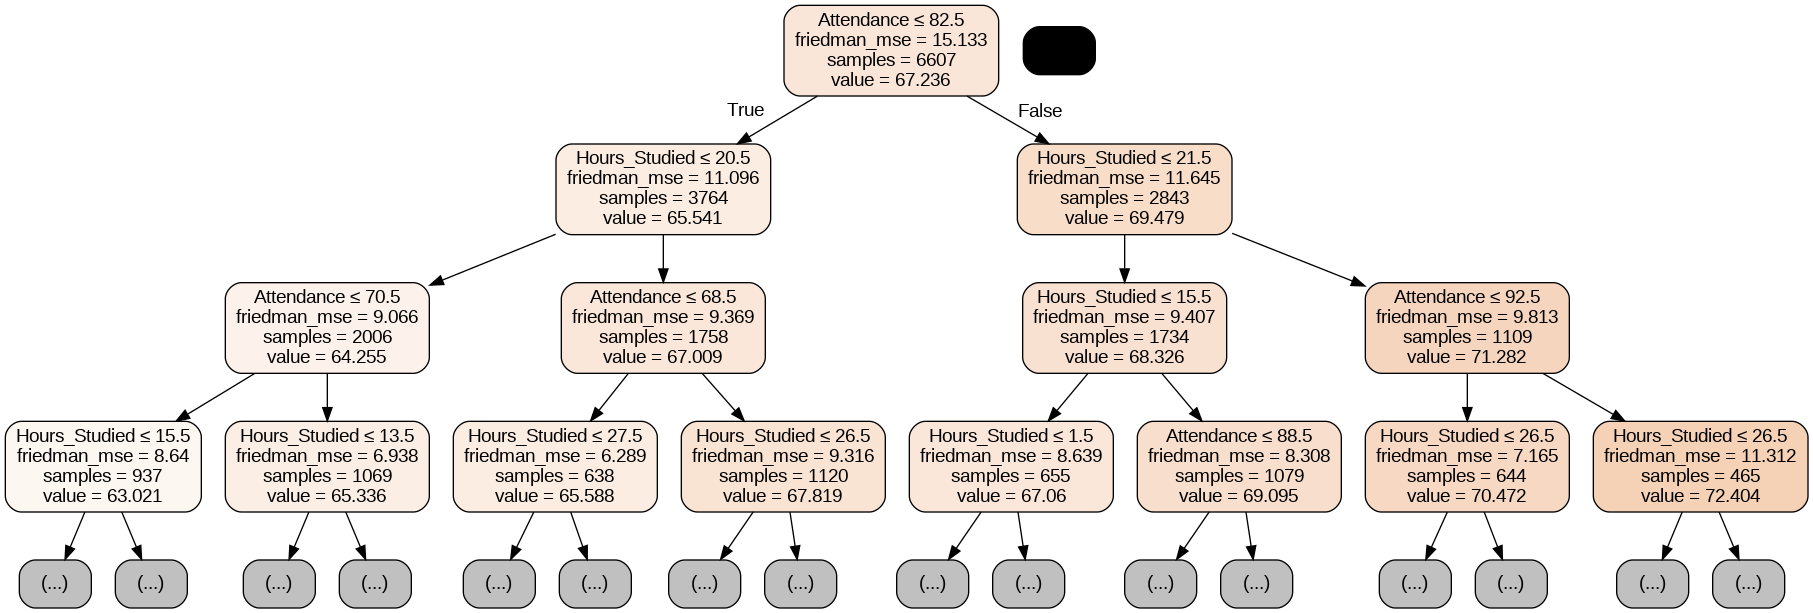

In [16]:
from IPython.utils.capture import StringIO
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data, max_depth=3,
               filled=True, rounded=True, feature_names=X.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
pred = reg.predict(X)
pred

array([69.29166667, 63.15918367, 72.49333333, ..., 68.56410256,
       65.93023256, 62.58490566])